Download aydao-anime-danbooru2019s-512-5268480.pkl  
from https://www.gwern.net/Faces#tadne-download  
to Google Drive MyDrive/workspace.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/piyo7/gan-playground/blob/main/tadne/style-mixing-tadne.ipynb)

Select GPU from the Hardware Accelerator.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/aydao/stylegan2-surgery.git

Cloning into 'stylegan2-surgery'...
remote: Enumerating objects: 1557, done.
remote: Total 1557 (delta 0), reused 0 (delta 0), pack-reused 1557
Receiving objects: 100% (1557/1557), 17.03 MiB | 39.35 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.


In [16]:
%%capture
!apt install imagemagick

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from IPython.display import Image
network = '/content/drive/MyDrive/workspace/aydao-anime-danbooru2019s-512-5268480.pkl'

In [5]:
%cd /content/stylegan2-surgery

/content/stylegan2-surgery


In [6]:
%run run_generator.py generate-images --seeds=51922,54098 --truncation-psi=1.0 --network={network}

Local submit - run_dir: results/00000-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "/content/drive/MyDrive/workspace/aydao-anime-danbooru2019s-512-5268480.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.
Generating image for seed 51922 (0/2) ...
Generating image for seed 54098 (1/2) ...
dnnlib: Finished run_generator.generate_images() in 1m 15s.


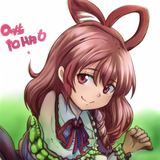

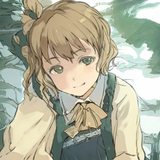

In [23]:
dir = '/content/stylegan2-surgery/results/00000-generate-images'
!convert -resize 160x160 {dir}/seed51922.png {dir}/seed51922_r.png
!convert -resize 160x160 {dir}/seed54098.png {dir}/seed54098_r.png
display(Image(f'{dir}/seed51922_r.png'))
display(Image(f'{dir}/seed54098_r.png'))

In [8]:
%run run_generator.py style-mixing-example --row-seeds=51922,54098,55018,58918 --col-seeds=51922,54098,55018,58918 --truncation-psi=1.0 --network={network}

Local submit - run_dir: results/00001-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "/content/drive/MyDrive/workspace/aydao-anime-danbooru2019s-512-5268480.pkl"...
Generating W vectors...
Generating images...
Generating style-mixed images...
Saving images...
Saving image grid...
dnnlib: Finished run_generator.style_mixing_example() in 20s.


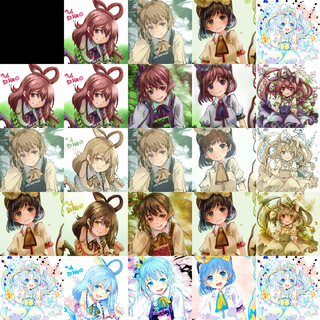

In [24]:
dir = '/content/stylegan2-surgery/results/00001-style-mixing-example'
!convert -resize 320x320 {dir}/grid.png {dir}/grid_r.png
display(Image(f'{dir}/grid_r.png'))